<h1 style="text-align:center;">Final Project - Natural Image Recognition Using CNN</h1><br>
<div class="alert alert-block alert-info" style="text-align:left;">
    <p style="text-align:left;"><b>Natural Images : </b> In this dataset, there are 8 distinct classes compiled from various sources which contains 6,899 images. These classes include airplane, car, cat, dog, flower, fruit, motorbike and person. 
The dataset is available at Kaggle. Source: <a href="https://www.kaggle.com/prasunroy/natural-images">Kaggle Dataset</a><br>
        <br>
        The motive of this project is to identify the above images using Neural Network.</p>
</div>   

## Table of Contents:

1. [Introduction to CNN](#Introduction-to-CNN)

2. [Imports and Configuration](#Imports-and-Configuration)

3. [Loading and Image pre-processing](#Loading-and-Image-pre-processing)

4. [CNN Model](#CNN-Model)

5. [Model Performance](#Model-Performance)

6. [Data Augmentation](#Data-Augmentation)

7. [Predicted Images](#Predicted-Images)

8. [Conclusion](#Conclusion)

<div class="alert alert-block alert-info">
    <h1 style="text-align:center;">Introduction to CNN</h1>
    <br>
</div>  

### Convolutional Neural Network (CNN)

![alt text](notebook_img/CNN.jpeg 'https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 - Sumit Saha')

In deep learning, a **convolutional neural network (CNN, or ConvNet)** is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics. They have applications in image and video recognition, recommender systems, image classification, medical image analysis, **natural language processing**, and financial time series.

CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns. Therefore, on the scale of connectedness and complexity, CNNs are on the lower extreme.

### Project Overview

We will be Using CNN model to Predict Natural images from 8 categories. This dataset has 6,899 images in total distributed in these catagories which are:  

<ul>
            <li>Airplane</li>
            <li>Car</li>
            <li>Motorbike</li> 
            <li>Dog</li>
            <li>Cat</li>
            <li>Fruit</li>
            <li>Flower</li>
            <li>Person</li>
    </ul>

<div class="alert alert-block alert-info">
    <h1 style="text-align:center;">Imports and Configuration</h1>
    <br>
</div>  

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import cv2 # OpenCV

from numpy import array
import matplotlib.pyplot as plt
import random
from numpy.random import seed
import math

from keras.models import Sequential
from keras.layers import Convolution2D,BatchNormalization
from keras.layers import MaxPooling2D,Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image 
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import sys
import os

#use the below path while working in Google colab
#my_path = '/content/drive/My Drive/natural_images'

#Comment this path if using Google colab
my_path = 'C:\\Users\\srush\\Documents\\Srushti NEU\\Full Summer 2020\\INFO 6105 Data Science Engineering Methods and Tools\\Final Project\\natural_images'
categories = os.listdir(my_path)
print(categories)


['cat', 'dog', 'motorbike', 'fruit', 'flower', 'car', 'person', 'airplane']


[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

<div class="alert alert-block alert-info">
    <h1 style="text-align:center;">Loading and Image pre-processing</h1>
    <br>
</div>  

### Loading Images from each category

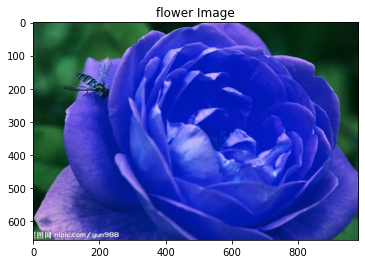

(657, 982, 3)


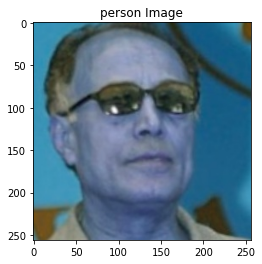

(256, 256, 3)


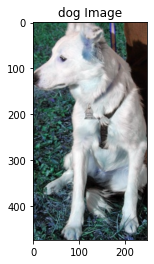

(475, 249, 3)


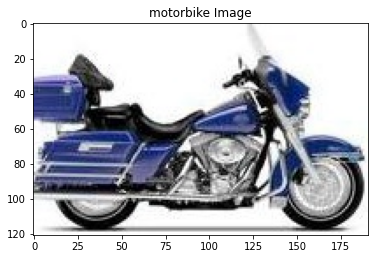

(121, 191, 3)


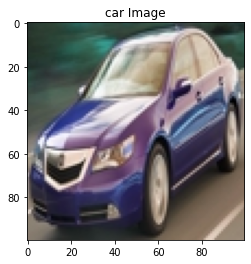

(100, 100, 3)


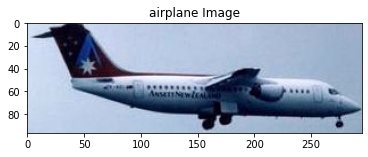

(97, 295, 3)


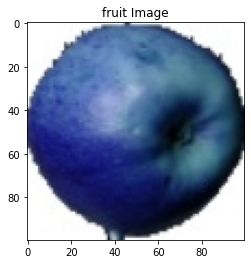

(100, 100, 3)


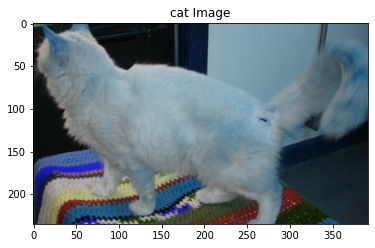

(235, 392, 3)


In [3]:
CATEGORIES= ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


seed(55)

random.shuffle(CATEGORIES)

for category in CATEGORIES:
    path=os.path.join(my_path,category)
    
    for img in os.listdir(path):        
        i = cv2.imread(os.path.join(path,img))
                     
        plt.title(img[:-9] + " Image")
        plt.imshow(i)
        plt.show()
        print(i.shape)
        
        break

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Loading, resizing and converting all images and its label to array

In [4]:

data=[] # image data converted to array will be stored in this list
label =[] # image label e.g. dog, cat etc converted to 1D array will be stored in this list.
num=[]

#Loop to Load Images from all 8 categories
for category in CATEGORIES:
        n=0
        path=os.path.join(my_path,category) 
        print("Category " + category + ' : Loading Images...')  
        for img in os.listdir(path):
               
            # reading images from path
            i = cv2.imread(os.path.join(path,img))        

            # resizing the image to 128 X 128
            i = cv2.resize(i,(128,128),interpolation=cv2.INTER_AREA )   
            
            # convert image to numpy array
            data.append(img_to_array(i))
            label.append(category)
            n+=1
            
        print(str(n)+' '+category.upper() + ' images loaded.\n')
        num.append(n)
        
print("Loading completed!")

Category flower : Loading Images...
843 FLOWER images loaded.

Category person : Loading Images...
986 PERSON images loaded.

Category dog : Loading Images...
702 DOG images loaded.

Category motorbike : Loading Images...
788 MOTORBIKE images loaded.

Category car : Loading Images...
968 CAR images loaded.

Category airplane : Loading Images...
727 AIRPLANE images loaded.

Category fruit : Loading Images...
1000 FRUIT images loaded.

Category cat : Loading Images...
885 CAT images loaded.

Loading completed!


In [5]:
print("Total number of images: "+ str(sum(num)))

Total number of images: 6899


In [6]:
#length of array: data and label
print("Images : " + str(len(data)),"Label : " + str(len(label)))

Images : 6899 Label : 6899


[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Image and its Label conerted to array

In [7]:
#converting data to np.array with data type float and divide by 255 to normalize the pixel values 
#so that each pixel value has a value between 0 and 1

data = np.array(data, dtype="float") / 255.0
label = np.array(label)

#converting label array to LabelBinarizer
lb = LabelBinarizer()
label = lb.fit_transform(label)

print("Image Label after conversion in 1D array: ")
print(label[0])
print("\nImage data array: \n" +str(data[0]))


Image Label after conversion in 1D array: 
[0 0 0 0 1 0 0 0]

Image data array: 
[[[0.13333333 0.32156863 0.20784314]
  [0.11372549 0.30588235 0.18431373]
  [0.10980392 0.30980392 0.18823529]
  ...
  [0.01568627 0.1254902  0.04705882]
  [0.01960784 0.1254902  0.04705882]
  [0.01960784 0.1254902  0.04705882]]

 [[0.1254902  0.32156863 0.20784314]
  [0.10980392 0.31372549 0.19607843]
  [0.10196078 0.30588235 0.18823529]
  ...
  [0.01176471 0.12156863 0.04313725]
  [0.01960784 0.1254902  0.04705882]
  [0.01568627 0.12156863 0.04313725]]

 [[0.11764706 0.31764706 0.2       ]
  [0.10980392 0.31372549 0.19607843]
  [0.10980392 0.31372549 0.19607843]
  ...
  [0.01176471 0.12156863 0.04313725]
  [0.01568627 0.12156863 0.04313725]
  [0.01176471 0.11764706 0.03921569]]

 ...

 [[0.68235294 0.76862745 0.68627451]
  [0.42745098 0.61176471 0.44705882]
  [0.56078431 0.65882353 0.57254902]
  ...
  [0.16470588 0.39607843 0.21960784]
  [0.16470588 0.39215686 0.21568627]
  [0.16862745 0.40392157 0.22352

In [8]:
#data and label shape
print("Shape of Image array(data): " +str(data.shape))
print("Shape of Image label: " +str(label.shape))

Shape of Image array(data): (6899, 128, 128, 3)
Shape of Image label: (6899, 8)


[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Train Test Split

In [9]:
#train-test split
(x_train,x_test,y_train,y_test)=train_test_split(data,label,test_size=0.2,random_state=66)

print("Size of training and testing dataset")
print("x Train dataset : "+ str(len(x_train)))
print("x Test dataset : "+ str(len(x_test)))
print("y Train dataset : "+ str(len(y_train)))
print("y Test dataset : "+ str(len(y_test)))

Size of training and testing dataset
x Train dataset : 5519
x Test dataset : 1380
y Train dataset : 5519
y Test dataset : 1380


[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

<div class="alert alert-block alert-info">
    <h1 style="text-align:center;">CNN Model</h1>
    <br>
</div>  

### Building CNN Model

In [10]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Convolution2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu',padding='same'))
# Adding a second convolutional layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu',padding='same'))
# step 2 - Pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
classifier.add(Convolution2D(64, (3, 3), activation = 'relu',padding='same'))
classifier.add(Convolution2D(64, (3, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
classifier.add(Convolution2D(128, (3, 3), activation = 'relu',padding='same'))
classifier.add(Convolution2D(128, (3, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
classifier.add(Convolution2D(256, (3, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dense(1024,activation='relu'))
classifier.add(Dropout(0.5))
# Step 4 - Full connection
classifier.add(Dense( 8, activation = 'softmax'))

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Compiling Model

In [11]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Model plot

CNN Model



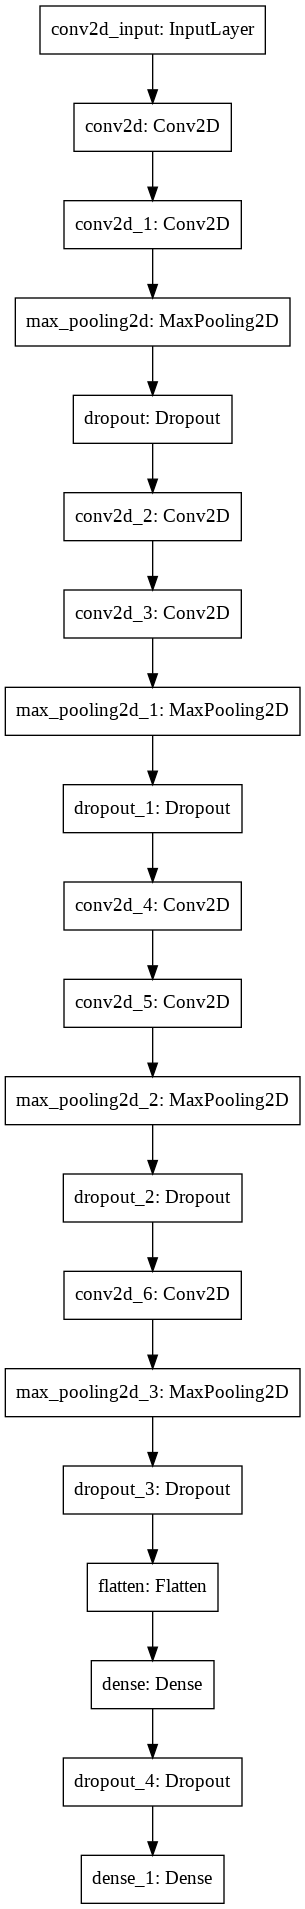

In [12]:
print("CNN Model\n")
import pydot
plot_model(classifier, to_file='convolutional_neural_network.png')

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Fitting Model

In [13]:
# fitting the CNN 
history =classifier.fit(x_train,y_train, batch_size = 64, epochs = 10, validation_split=0.1)

Epoch 1/10
78/78 [==============================] - 8s 97ms/step - loss: 1.8777 - accuracy: 0.2509 - val_loss: 1.3254 - val_accuracy: 0.5308
Epoch 2/10
78/78 [==============================] - 6s 83ms/step - loss: 0.9171 - accuracy: 0.6734 - val_loss: 0.8131 - val_accuracy: 0.7156
Epoch 3/10
78/78 [==============================] - 7s 84ms/step - loss: 0.5020 - accuracy: 0.8186 - val_loss: 0.3497 - val_accuracy: 0.8786
Epoch 4/10
78/78 [==============================] - 7s 84ms/step - loss: 0.3608 - accuracy: 0.8701 - val_loss: 0.2965 - val_accuracy: 0.8931
Epoch 5/10
78/78 [==============================] - 7s 85ms/step - loss: 0.2785 - accuracy: 0.8977 - val_loss: 0.3163 - val_accuracy: 0.9004
Epoch 6/10
78/78 [==============================] - 7s 85ms/step - loss: 0.2181 - accuracy: 0.9166 - val_loss: 0.2982 - val_accuracy: 0.8986
Epoch 7/10
78/78 [==============================] - 7s 86ms/step - loss: 0.1763 - accuracy: 0.9332 - val_loss: 0.2521 - val_accuracy: 0.9149
Epoch 8/10
78

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

<div class="alert alert-block alert-info">
    <h1 style="text-align:center;">Model Performance</h1>
    <br>
</div>

### Graph: Epoch vs Accuracy

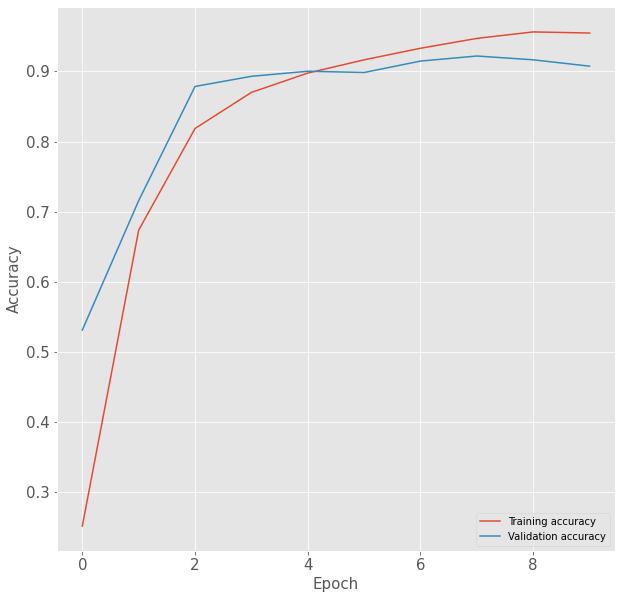

In [14]:
#epoch vs accuracy

    
from matplotlib import style
style.use("ggplot")

plt.figure(figsize=(10,10))

plt.plot( history.history['accuracy'])
plt.plot( history.history['val_accuracy'])

plt.xlabel('Epoch',fontsize=15)
plt.ylabel("Accuracy",fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right',fontsize=10)

plt.show()

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Graph: Epoch vs Loss

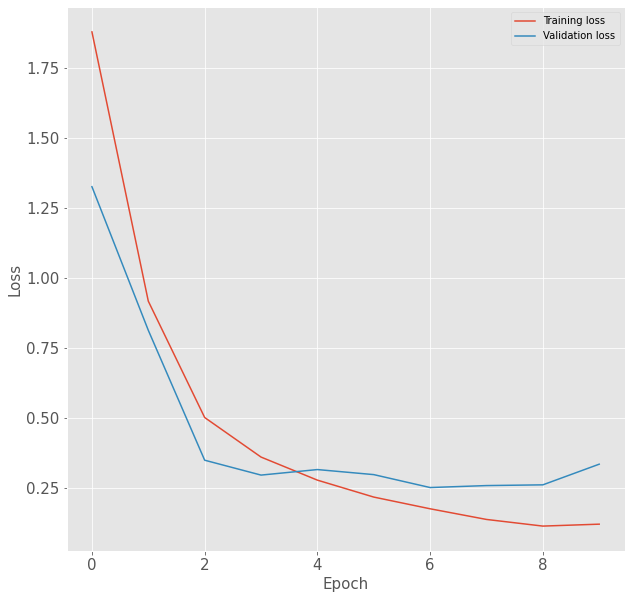

In [15]:
#epoch vs accuracy, loss plot

plt.figure(figsize=(10,10))

plt.plot( history.history['loss'])
plt.plot( history.history['val_loss'])

plt.xlabel('Epoch',fontsize=15)
plt.ylabel("Loss",fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(['Training loss', 'Validation loss'], loc='upper right',fontsize=10)

plt.show()

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Saving Model to Local

In [16]:
# save model and architecture to single file

classifier.save('CNN_natural-images_ep10.h5')

print("Model saved to disk")

Model saved to disk


In [17]:
# load model
from keras.models import load_model

model = load_model('CNN_natural-images_ep10.h5')

print("Model loaded from disk")

Model loaded from disk


[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Model Accuracy 

In [18]:
#calculating accuracy on test of above model
pred_label_1 = model.predict(x_test, batch_size=None, verbose=0)

total = 0
correct = 0
correct_index = []
wrong_index = []

for i in range(len(pred_label_1)):
    if np.argmax(pred_label_1[i]) == np.argmax(y_test[i]):
        correct += 1
        correct_index.append(i)
    else:
        wrong_index.append(i)
        
    total += 1
    
print("Model without Data Augmentation -")
print('Total test data:', total, '\nAccurately predicted data:', correct, '\nWrongly predicted data: ', total - correct)
print('\nAccuracy:', round(correct/total*100, 3), '%')

Model without Data Augmentation -
Total test data: 1380 
Accurately predicted data: 1246 
Wrongly predicted data:  134

Accuracy: 90.29 %


Clearily from above results, we can observe that our model is overfitting the data so we need to reduce this effect and make the model work well on both crossvalidation data and test data as well.
Hence, will perform something called **Data augmentation** to generate more data from the current data by modifying the current data .

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

<div class="alert alert-block alert-info">
    <h1 style="text-align:center;">Data Augmentation</h1>
    <br>
</div>

### Augmenting data using ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(zoom_range=0.2, 
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)

In [20]:
#Data Augmentation using ImageDataGenerator
batch_size = 64
history_1 = classifier.fit_generator(train_datagen.flow(x_train,y_train,batch_size=batch_size), 
                                     steps_per_epoch = math.ceil(len(x_train)//100), epochs = 10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
55/55 [==============================] - 13s 236ms/step - loss: 0.9697 - accuracy: 0.6770
Epoch 2/10
55/55 [==============================] - 13s 236ms/step - loss: 0.6459 - accuracy: 0.7659
Epoch 3/10
55/55 [==============================] - 13s 237ms/step - loss: 0.5704 - accuracy: 0.8031
Epoch 4/10
55/55 [==============================] - 13s 239ms/step - loss: 0.5380 - accuracy: 0.8035
Epoch 5/10
55/55 [==============================] - 13s 237ms/step - loss: 0.4287 - accuracy: 0.8392
Epoch 6/10
55/55 [==============================] - 13s 238ms/step - loss: 0.4311 - accuracy: 0.8426
Epoch 7/10
55/55 [==============================] - 13s 238ms/step - loss: 0.3846 - accuracy: 0.8560
Epoch 8/10
55/55 [==============================] - 13s 234ms/step - loss: 0.3639 - accuracy: 0.8583
Epoch 9/10
55/55 [==============================] - 13s 240ms/step - loss: 0.3581 - accuracy: 0.8634
Epoch 10/10
55/

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

### Displaying augmented images

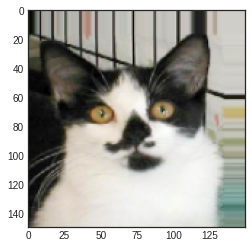

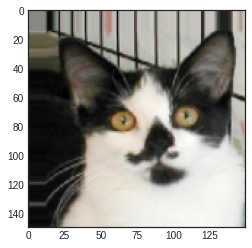

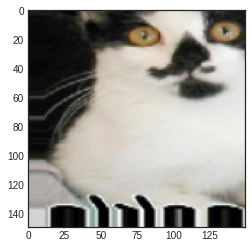

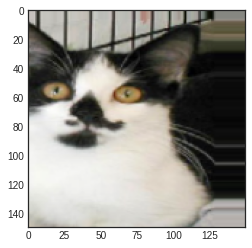

In [21]:
#load Augmented image
plt.style.use('seaborn-white') 
path=os.path.join(my_path,category)
fname = os.path.join(path,os.listdir(os.path.join(my_path,category)) [78])
img = image.load_img(fname , target_size=(150,150))

x = image.img_to_array(img) #Converts image into array 
x = x.reshape((1,) + x.shape)
i=0

for batch in train_datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i+1
    if i%4 == 0 :
        break
plt.show()

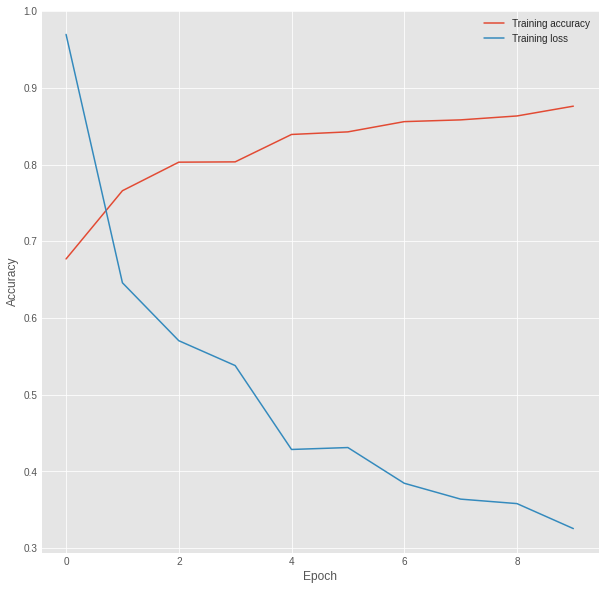

In [22]:
style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot( history_1.history['accuracy'])
plt.plot( history_1.history['loss'])
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['Training accuracy','Training loss'], loc='upper right')
plt.show()

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Saving Model after Data Augmentation

In [23]:
# save model and architecture to single file
classifier.save('CNN_natural-images-with-augmentation_ep10.h5')
print("Model saved to disk")

Model saved to disk


In [24]:
#loading model
model_1 = load_model('CNN_natural-images-with-augmentation_ep10.h5')
print("Model loaded from disk")

Model loaded from disk


[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Model Accuracy after Data Augmentation

In [25]:
#calculating accuracy on test of above model after data augmentation

pred_label_2 = model_1.predict(x_test, batch_size=None, verbose=0)

total = 0
correct = 0
correct_index = []
wrong_index = []

for i in range(len(pred_label_2)):
    if np.argmax(pred_label_2[i]) == np.argmax(y_test[i]):
        correct += 1
        correct_index.append(i)
    else:
        wrong_index.append(i)
        
    total += 1

print("Model with Data Augmentation -")  
print('Total test data:', total, '\nAccurately predicted data:', correct, '\nWrongly predicted data: ', total - correct)
print('\nAccuracy:', round(correct/total*100, 3), '%')

Model with Data Augmentation -
Total test data: 1380 
Accurately predicted data: 1263 
Wrongly predicted data:  117

Accuracy: 91.522 %


[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

<div class="alert alert-block alert-info">
    <h1 style="text-align:center;">Predicted Images</h1>
    <br>
</div>

### Correctly Predicted Images

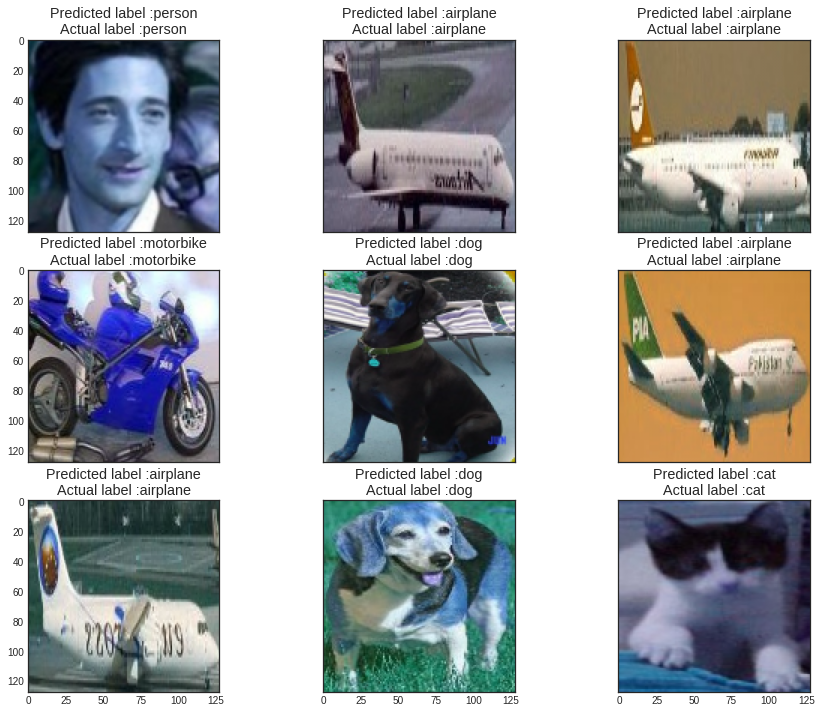

In [26]:
#displaying correctly predicted images

labels=['airplane','car','cat','dog','flower','fruit','motorbike','person']

image_idx = random.sample(correct_index,k=9)

row=3
col=3

plt.style.use('seaborn-white')
fig,ax = plt.subplots(row, col, sharex=True, sharey=True, figsize=(15,12))

n = 0
for r in range(row):
    for c in range(col):
            ax[r,c].imshow(x_test[image_idx[n]])
            ax[r,c].set_title("Predicted label :{}\nActual label :{}".format(labels[np.argmax(pred_label_2[image_idx[n]])], 
                                                                           labels[np.argmax(y_test[image_idx[n]])]))
            n += 1

plt.show()


[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

### Incorrectly Predicted Images

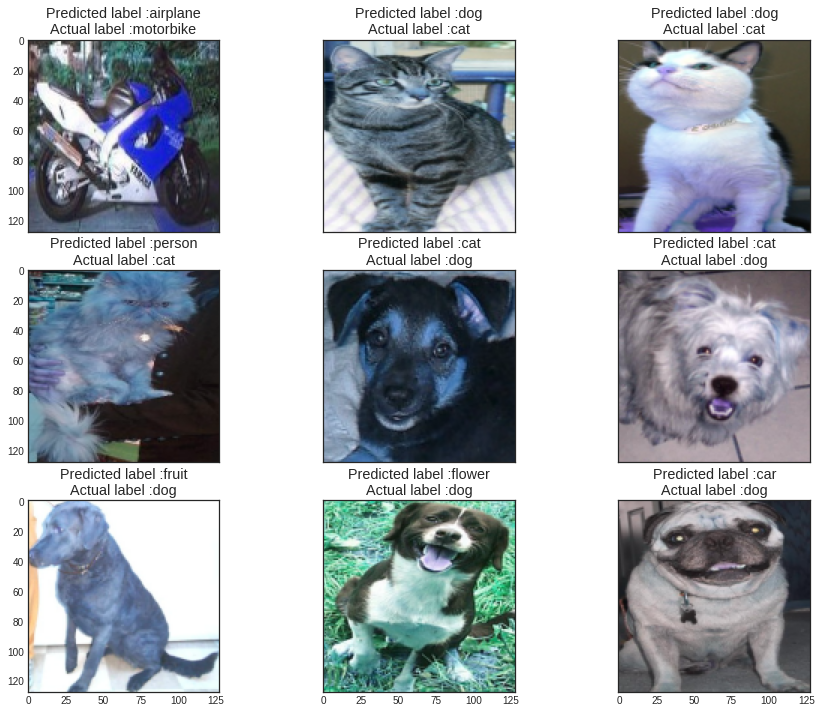

In [27]:
#displaying incorrectly predicted images
image_idx = random.sample(wrong_index,k=9)

row=3
col=3

fig,ax = plt.subplots(row, col, sharex=True, sharey=True, figsize=(15,12))

n = 0
for r in range(row):
    for c in range(col):
            ax[r,c].imshow(x_test[image_idx[n]])
            ax[r,c].set_title("Predicted label :{}\nActual label :{}".format(labels[np.argmax(pred_label_2[image_idx[n]])], 
                                                                            labels[np.argmax(y_test[image_idx[n]])]))
            n += 1

plt.show()

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

<div class="alert alert-block alert-info">
    <h1 style="text-align:center;">Conclusion</h1>
    <br>
</div>

We Studied the CNN – Deep Neural Network by implementing and building the CNN model to Train and Test our model successfully on the Kaggle Natural Images Dataset.  
The Model was able to get an accuracy in range 90 – 92%. We enhanced the Model accuracy by implementing Image Data Augmentation in this model.  
This Project help me in understanding the real-world application of Data Science Engineering Methods and Tools.  
The model can be enhanced by using VGG16 (A CNN architecture) and by also giving a larger dataset from ImageNet.  

[Scroll Top](#Final-Project---Natural-Image-Recognition-Using-CNN)

---

<div class="alert alert-block alert-info">
    <b>Copyright</b> 2020 Srushti Dhamangaonkar<br>
    <br>Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
    <br>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
    <br>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    <br><br>
    
<div class="text-center">
    <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br>
</div></div>